Name : Ishika Chittora
Aim : Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
import cv2
import warnings
warnings.filterwarnings('ignore')

#load the image and convert it to dataframe

In [91]:
dir = 'C:\\Users\\ISHIKA JAIN\\Downloads\\test_set\\test_set'

In [92]:
categories = ['cats', 'dogs']
data = []

In [93]:

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
            imgpath=os.path.join(path,img)
            pet_img=cv2.imread(imgpath,0)
            try:
                pet_img=cv2.resize(pet_img,(50,50))
                image=np.array(pet_img).flatten()
                data.append([image,label])
            except Exception as e:
                pass

In [94]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [95]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

In [96]:
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [97]:
xtrain, xtest, ytrain,ytest= train_test_split(features, labels, test_size = 0.03)

Accuracy is:  0.639344262295082
Prediction is:  Dog


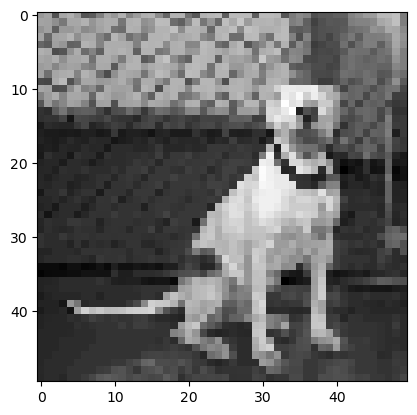

In [98]:
model = SVC(C=1,kernel='poly',gamma= 'auto')
model.fit(xtrain, ytrain)
#pick=open('test_set.zip','rb')
#model=pickle.load(pick)
#pick.close()
prediction=model.predict(xtest)

accuracy=model.score(xtest,ytest)

categories=['Cat', 'Dog']

print('Accuracy is: ', accuracy)
print('Prediction is: ', categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet, cmap='gray')
plt.show()